In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 준비
# 상대경로로 CSV 읽어오기
file_path = '../../training_data.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터 확인
print(df.head())

   Unnamed: 0  leverage_ratio  asset_liabilities    roe  asset_turnover  \
0           1          14.933           1.067048  0.107           0.081   
1           2          14.734           1.067941  0.117           0.085   
2           3          15.294           1.065449  0.137           0.085   
3           4          13.652           1.072060  0.167           0.097   
4           5          13.390           1.071841  0.151           0.106   

   debt_ratio  debt_ratio2    roa  capitalization_ratio  longtermdebt_invcap  \
0       0.937        0.043  0.018                 0.244                0.244   
1       0.936        0.041  0.020                 0.230                0.230   
2       0.939        0.049  0.021                 0.317                0.317   
3       0.932        0.070  0.025                 0.272                0.298   
4       0.930        0.071  0.023                 0.244                0.264   

   totaldebt_invcap  cash_debt  debt_ebitda  rect_turn  label  
0   

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# X, y 분리
X = df.drop('label', axis=1)
y = df['label']

# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9874196253844003
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3512
           1       0.79      0.42      0.55        65

    accuracy                           0.99      3577
   macro avg       0.89      0.71      0.77      3577
weighted avg       0.99      0.99      0.99      3577



c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [11:26:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


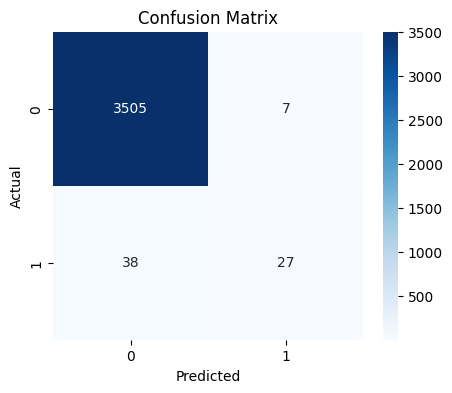

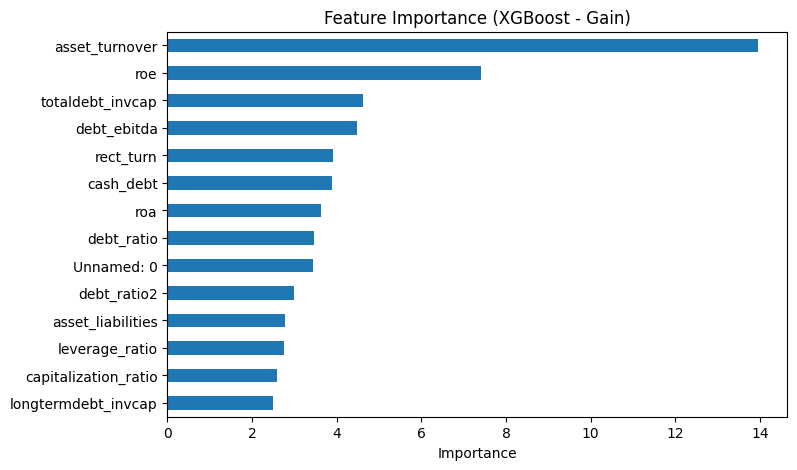

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance 시각화 (Gain 기준)
importances = model.get_booster().get_score(importance_type='gain')
importances = pd.Series(importances).reindex(X.columns).fillna(0)

plt.figure(figsize=(8,5))
importances.sort_values().plot(kind='barh')
plt.title('Feature Importance (XGBoost - Gain)')
plt.xlabel('Importance')
plt.show()